In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from ydata_profiling import ProfileReport

In [90]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [91]:
train_data = pd.read_csv('../Data/train_data.csv', index_col='Claim Identifier')


/var/folders/m0/h643h92s02b7_ptjdwmyydmr0000gn/T/ipykernel_12211/3281014697.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../Data/train_data.csv', index_col='Claim Identifier')


In [92]:
y = train_data['Claim Injury Type']
df = train_data.drop(columns='Claim Injury Type',)

In [93]:
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [94]:
df.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120584215,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818961390,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df.shape


(593471, 31)

Surprise we have a whole fucking lot of features with Dtype object

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  County of Injury      

In [97]:
df.describe(include='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,574026,574026,574026,574026,150798,574026,132803.000000,564068.000000,564068,574026,0.0,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,8,63,2,8,1094,4,NaN,NaN,20,5,NaN,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,2022-04-15,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,285368,60430,546505,270779,440,335218,NaN,NaN,114339,265981,NaN,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.207337,58.645305,NaN,NaN,NaN,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.832303,19.644175,NaN,NaN,NaN,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,11.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,NaN,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,61.000000,NaN,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,71.000000,NaN,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


We have duplicate values that need to be removed

In [98]:
#duplicated values
df.duplicated().sum()

18351

Since this all the claims have _`Assembly Date`_ we can assume that in order to have a claim you always have a _`Claim Identifier`_ (that we use as index) and an _`Assembly Date`_. So let's check the rows that only have _`Assembly Date`_ filled, i.e, empty rows.

In [99]:

only_assembly_date = df.drop(columns=['Assembly Date']).isnull().all(axis=1) & df['Assembly Date'].notnull()


num_only_assembly_date_filled = only_assembly_date.sum()
print(f"Number of rows with only 'Assembly Date' filled: {num_only_assembly_date_filled}")

Number of rows with only 'Assembly Date' filled: 19445


---



## Percentage of missing values per feature


In [100]:
df.isnull().sum()/df.shape[0]*100

Accident Date                           3.898084
Age at Injury                           3.276487
Alternative Dispute Resolution          3.276487
Assembly Date                           0.000000
Attorney/Representative                 3.276487
Average Weekly Wage                     8.104187
Birth Year                              8.176137
C-2 Date                                5.729850
C-3 Date                               68.449174
Carrier Name                            3.276487
Carrier Type                            3.276487
County of Injury                        3.276487
COVID-19 Indicator                      3.276487
District Name                           3.276487
First Hearing Date                     74.590502
Gender                                  3.276487
IME-4 Count                            77.622664
Industry Code                           4.954412
Industry Code Description               4.954412
Medical Fee Region                      3.276487
OIICS Nature of Inju

In [101]:
df.describe(include='O')
  

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


### Observations

#### Missing Values ####
OIICS Nature of Injury Description has no values

_`IME-4 Count`_, _`First Hearing Date`_ and _`C-3 Date`_ have >50% of entries missing ( 77.6%, 74.5 and 68.4%, respectively)

#### Single Value Feature ####
The feature _`WCB Decision`_ only has one value along the whole dataset (excluding missing values of course)

#### Categorical features that could be represented as boolean ####
Some categorical variables that only present 2 unique values, usually '1s and 0s' or 'Y or N' could be changed to boolean. Since we are not doing data pre-processing yet, these changes would have to preserve any NaN data. The variables are:
- Agreement Reached (0s and 1s)
- Attorney/Representative (Y or N)
- COVID-19 Indicator (Y or N)

---

# Type conversion
Here we are converting categorical variables that could be represented as boolean, meaning they only have two unique values, while still perserving the NaN entries present in the dataset.

In [102]:
#function to transform Y and N into boolean while preserving the NaNs
def transform_strings_in_bool(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].map({'Y': True, 'N': False, np.nan: np.nan})
    return df

In [103]:
# Agreement Reached only has values of  0s and 1s so lets convert it to boolean
df['Agreement Reached'] = df['Agreement Reached'].astype("boolean")


In [104]:

df = transform_strings_in_bool(df, ['Attorney/Representative','COVID-19 Indicator'])
print(df['Attorney/Representative'].unique(), df['COVID-19 Indicator'].unique())


[False True nan] [False nan True]


---

# Visual Exploration

## Numerical Features - univariate analysis

In [105]:
# numerical features only
num_feat = list(df.select_dtypes(include='number').columns)
print(num_feat)

# remove categorical variable with code
num_feat = [col for col in num_feat if 'Code' not in col]
num_feat = [col for col in num_feat if 'Description' not in col]
num_feat


['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']


['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents']

### Age at Injury

/opt/anaconda3/envs/DM2425/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


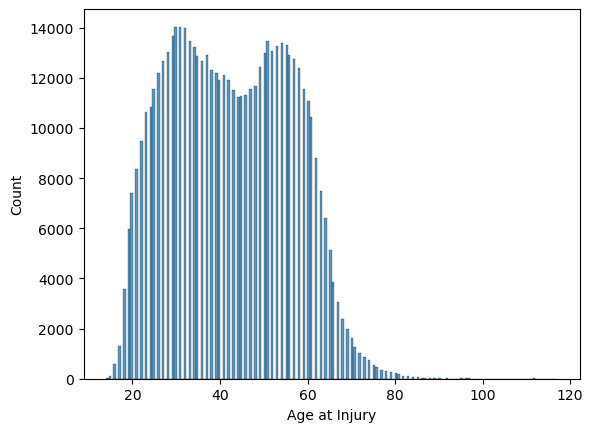

KeyError: 0

In [106]:
#14 is the minimum age to work in New York
sns.histplot(df[df['Age at Injury'] > 13]['Age at Injury'],)
plt.show()

sns.boxplot(df[df['Age at Injury'] > 13]['Age at Injury'])

### Average Weekly Wage

We can see that this feature has a lot of outliers that need to be treated further in the project

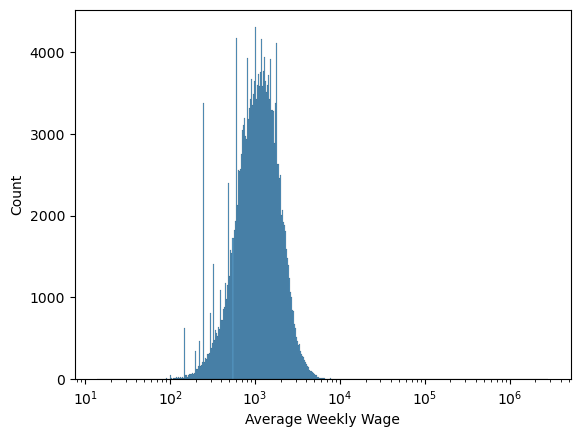

<Axes: ylabel='Average Weekly Wage'>

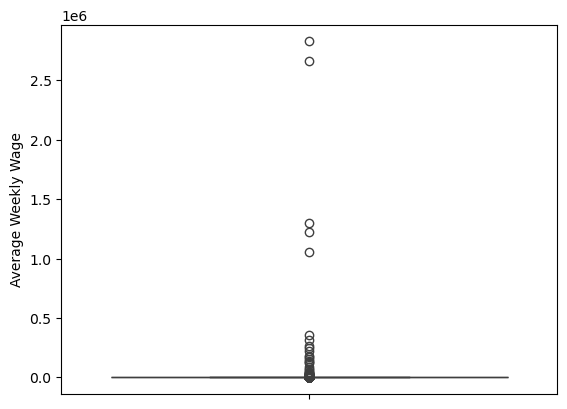

In [17]:
sns.histplot(df['Average Weekly Wage'], log_scale=True)
plt.show()

sns.boxplot(df['Average Weekly Wage'])

### Birth Year

Here we can see that _`Birth Year`_ has 25081 entries with the value 0

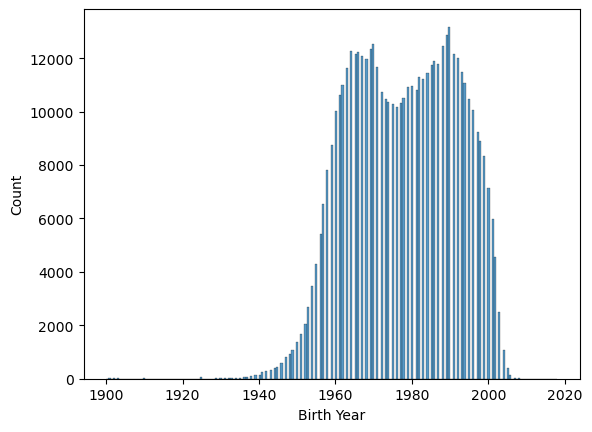

<Axes: ylabel='Birth Year'>

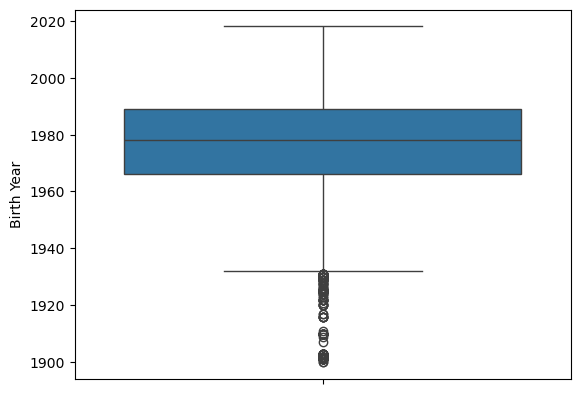

In [18]:
sns.histplot(df[df['Birth Year'] > 0]['Birth Year'],)
plt.show()

sns.boxplot(df[df['Birth Year'] > 0]['Birth Year'])

Here we can see that the values for Average Weekly Wage seem fine but due to the large amount of zeros, the auto attributed values for the will not work here

In [19]:
print(df['Average Weekly Wage'].describe())

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64


### Number of Dependents

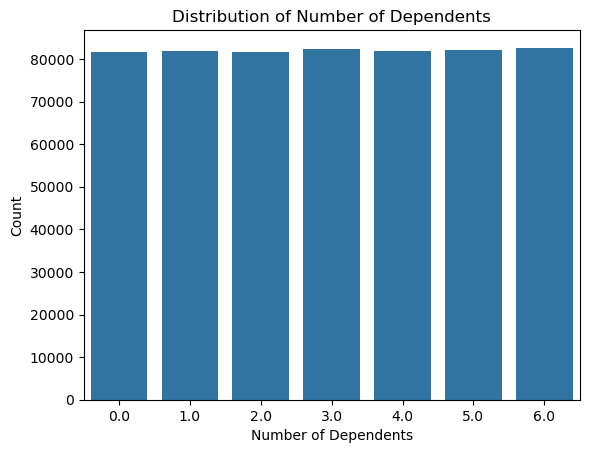

<Axes: ylabel='Number of Dependents'>

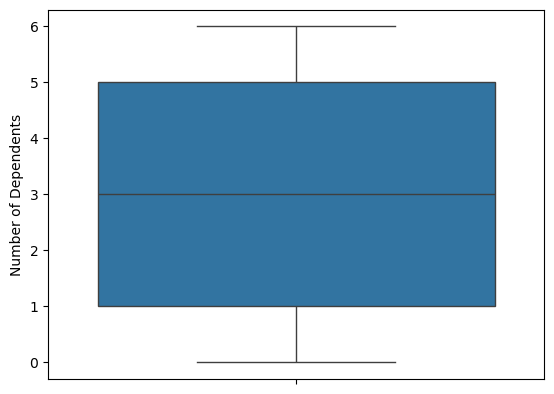

In [20]:
sns.countplot(x='Number of Dependents', data=df)
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Distribution of Number of Dependents')
plt.show()

sns.boxplot(df['Number of Dependents'])

### IME-4 Count

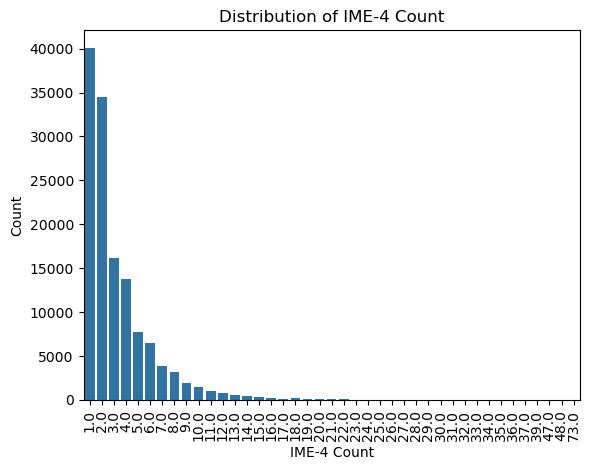

<Axes: ylabel='IME-4 Count'>

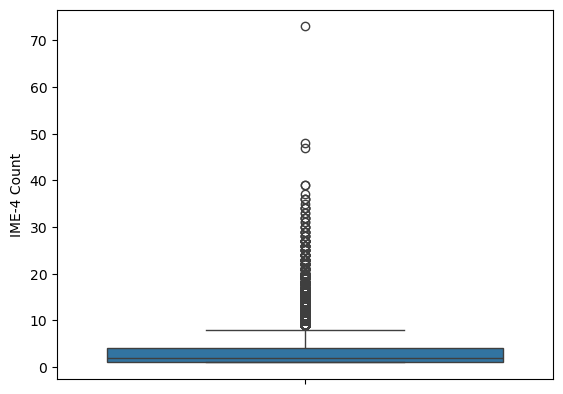

In [21]:
'IME-4 Count'

sns.countplot(x='IME-4 Count', data=df)
plt.xlabel('IME-4 Count')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.title('Distribution of IME-4 Count')
plt.show()

sns.boxplot(df['IME-4 Count'])

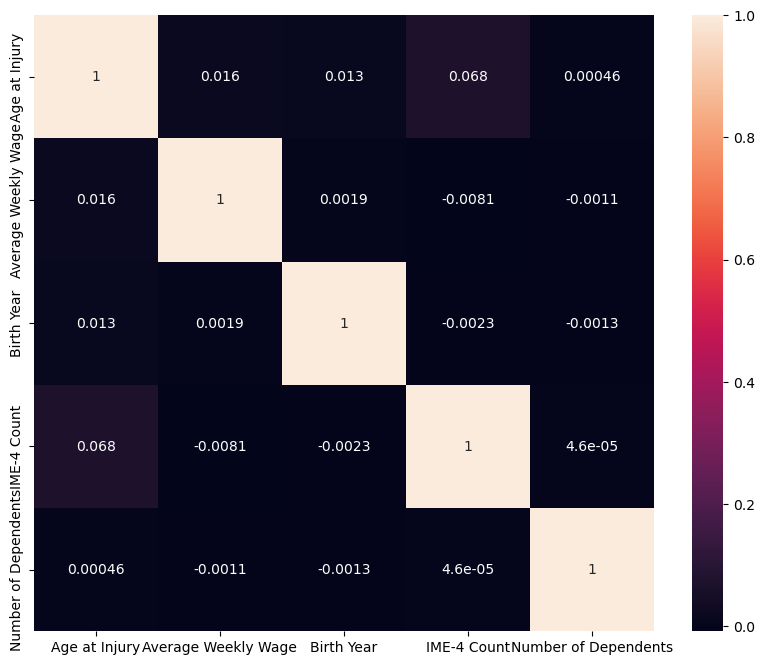

In [22]:
fig = plt.figure(figsize=(10, 8))


corr = df[num_feat].corr(method="pearson")


sns.heatmap(data=corr, annot=True, )


plt.show()

----

## Categorical Features

In [23]:
# select categorical features
df_cat = df.select_dtypes(include='object').columns.tolist()

# add columns that contain 'Code' or 'Description' in their name
df_cat += [col for col in df.columns if 'Code' in col or 'Description' in col]

# remove any duplicates (in case a column is already in both categories)
df_cat = list(set(df_cat))

df_cat

['COVID-19 Indicator',
 'Carrier Type',
 'OIICS Nature of Injury Description',
 'WCIO Nature of Injury Code',
 'Industry Code Description',
 'WCIO Part Of Body Code',
 'First Hearing Date',
 'C-2 Date',
 'Attorney/Representative',
 'Zip Code',
 'Alternative Dispute Resolution',
 'Assembly Date',
 'WCIO Cause of Injury Code',
 'Gender',
 'WCIO Part Of Body Description',
 'WCIO Nature of Injury Description',
 'WCB Decision',
 'C-3 Date',
 'County of Injury',
 'Medical Fee Region',
 'Industry Code',
 'Accident Date',
 'Carrier Name',
 'District Name',
 'WCIO Cause of Injury Description']

### Assembly Date

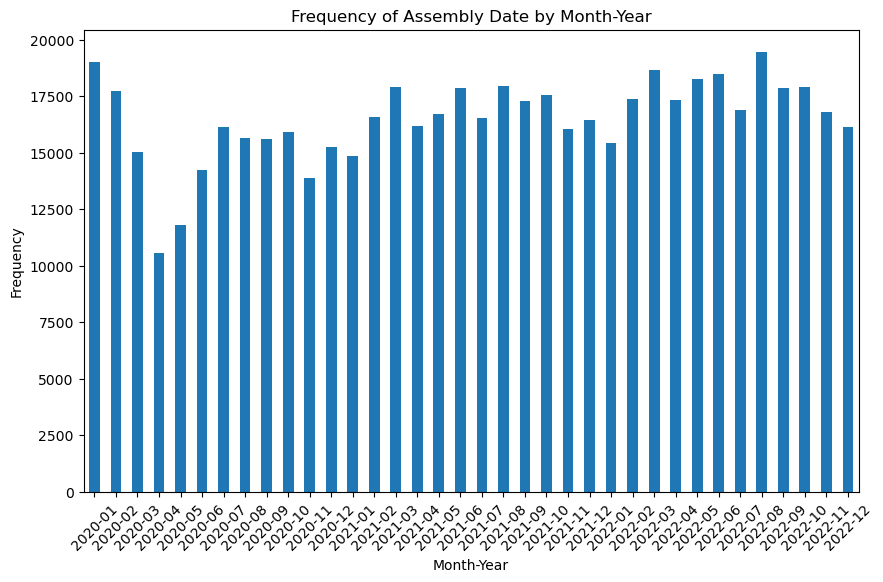

2020-01-01 00:00:00 2022-12-31 00:00:00


In [27]:
dfc = df.copy()
dfc['Assembly Date'] = pd.to_datetime(dfc['Assembly Date'])  
dfc['year_month'] = dfc['Assembly Date'].dt.to_period('M')  

dfc['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Frequency of Assembly Date by Month-Year')
plt.xticks(rotation=45)
plt.show()


### Accident Date

In [48]:
dfc = df.copy()
dfc['Accident Date'] = pd.to_datetime(dfc['Accident Date'])  

dfc = dfc[dfc['Accident Date'] >= '1961-01-01']

dfc['year'] = dfc['Accident Date'].dt.year
print(dfc['Accident Date'].min(), dfc['Accident Date'].max())

1961-09-06 00:00:00 2023-09-29 00:00:00


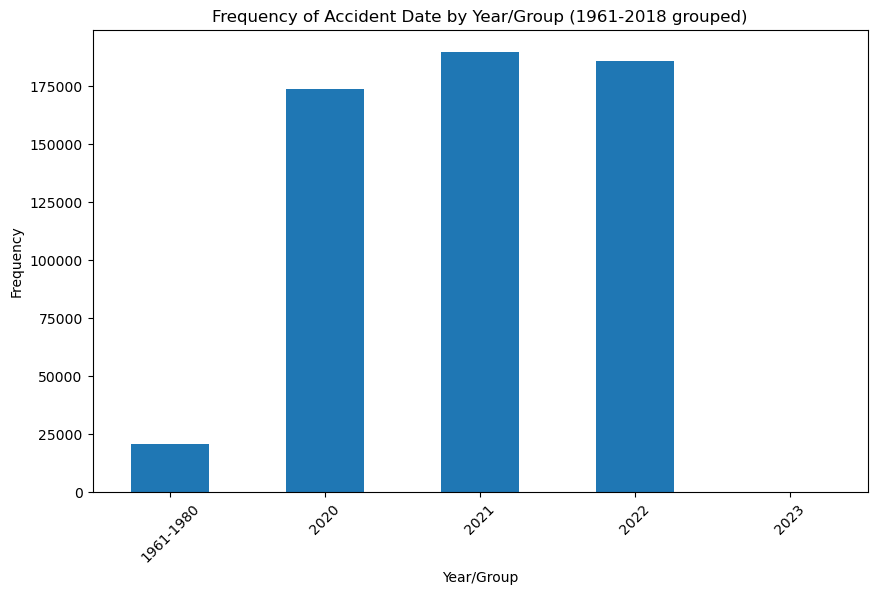

In [53]:
# consider only dates from 1961 onwards (because of the min value on the cell above)
dfc = dfc[dfc['Accident Date'] >= '1961-01-01']

# create a group for the first 59 year due to the low frequency
dfc['year_group'] = dfc['year'].apply(lambda x: '1961-2019' if x <= 2019 else str(x))

# count the frequency of the accident date by year
yearly_grouped_counts = dfc['year_group'].value_counts().sort_index()

# plot the frequency of the accident date by year
yearly_grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year/Group')
plt.ylabel('Frequency')
plt.title('Frequency of Accident Date by Year/Group (1961-2019 grouped)')
plt.xticks(rotation=45)
plt.show()

### C-2 and C-3 Date

In [64]:
dfc = df.copy()
dfc['C-2 Date'] = pd.to_datetime(dfc['C-2 Date'])  


dfc['year'] = dfc['C-2 Date'].dt.year
print(dfc['C-2 Date'].min(), dfc['C-2 Date'].max())

1996-01-12 00:00:00 2024-06-01 00:00:00


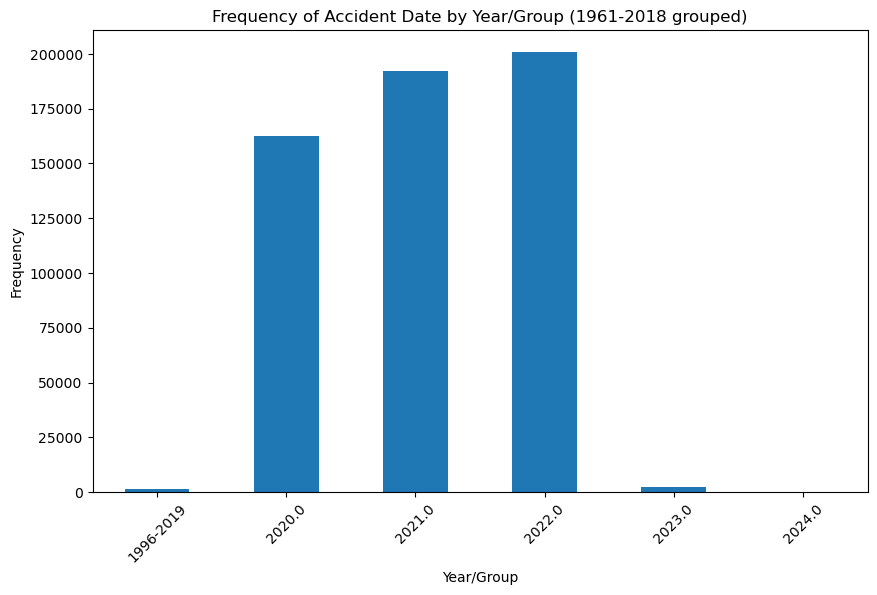

In [65]:
# consider only dates from 1996 onwards (because of the min value on the cell above)
dfc = dfc[dfc['C-2 Date'] >= '1996-01-1']

# create a group for the first 2ish decades due to the low frequency
dfc['year_group'] = dfc['year'].apply(lambda x: '1996-2019' if x <= 2019 else str(x))

# count the frequency of the accident date by year
yearly_grouped_counts = dfc['year_group'].value_counts().sort_index()

# plot the frequency of the accident date by year
yearly_grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year/Group')
plt.ylabel('Frequency')
plt.title('Frequency of C-2 Date by Year/Group (1996-2019 grouped)')
plt.xticks(rotation=45)
plt.show()

In [74]:
dfc = df.copy()

# Convert 'C-2 Date' and 'C-3 Date' to datetime
dfc['C-2 Date'] = pd.to_datetime(dfc['C-2 Date'])
dfc['C-3 Date'] = pd.to_datetime(dfc['C-3 Date'])

print(dfc['C-2 Date'].min(), dfc['C-2 Date'].max())
print(dfc['C-3 Date'].min(), dfc['C-3 Date'].max())



1996-01-12 00:00:00 2024-06-01 00:00:00
1992-11-13 00:00:00 2024-05-31 00:00:00


In [77]:
# consider only dates from 1996 onwards (because of the min value on the cell above) for C-2
dfc_c2 = dfc[dfc['C-2 Date'] >= '1996-01-01']
dfc_c2['year_c2'] = dfc_c2['C-2 Date'].dt.year

# consider only dates from 1992 onwards (because of the min value on the cell above) for C-3
dfc_c3 = dfc[dfc['C-3 Date'] >= '1992-01-01']
dfc_c3['year_c3'] = dfc_c3['C-3 Date'].dt.year


# group from the min year to 2019 and then by year due to the low frequency
dfc_c2['year_group_c2'] = dfc_c2['year_c2'].apply(lambda x: '1996-2019' if x <= 2019 else str(x))
dfc_c3['year_group_c3'] = dfc_c3['year_c3'].apply(lambda x: '1992-2019' if x <= 2019 else str(x))

# Calculate the frequency of the accident date by year group
yearly_grouped_counts_c2 = dfc_c2['year_group_c2'].value_counts().sort_index()
yearly_grouped_counts_c3 = dfc_c3['year_group_c3'].value_counts().sort_index()

C:\Users\isa\AppData\Local\Temp\ipykernel_4160\156952089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_c2['year_c2'] = dfc_c2['C-2 Date'].dt.year
C:\Users\isa\AppData\Local\Temp\ipykernel_4160\156952089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_c3['year_c3'] = dfc_c3['C-3 Date'].dt.year
C:\Users\isa\AppData\Local\Temp\ipykernel_4160\156952089.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

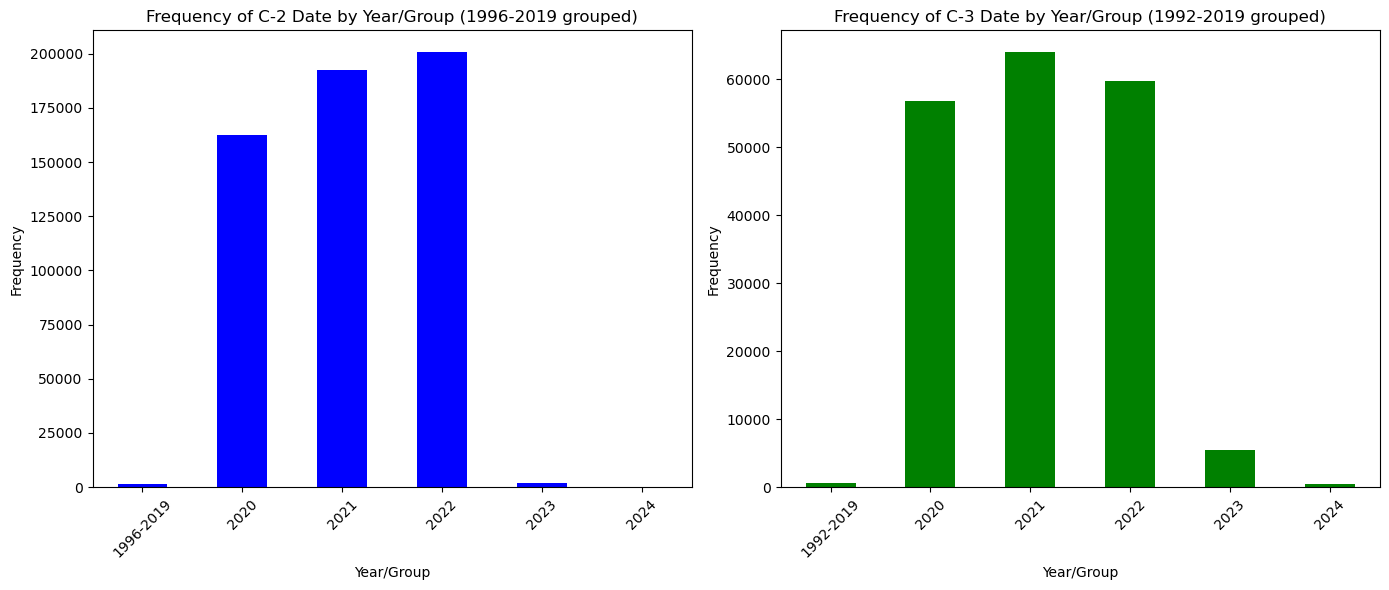

In [71]:
# Plot both graphs side by side using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# plot for C-2 Date
yearly_grouped_counts_c2.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_xlabel('Year/Group')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of C-2 Date by Year/Group (1996-2019 grouped)')
axes[0].tick_params(axis='x', rotation=45)

# plot for C-3 Date
yearly_grouped_counts_c3.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_xlabel('Year/Group')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of C-3 Date by Year/Group (1992-2019 grouped)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### First Hearing Date

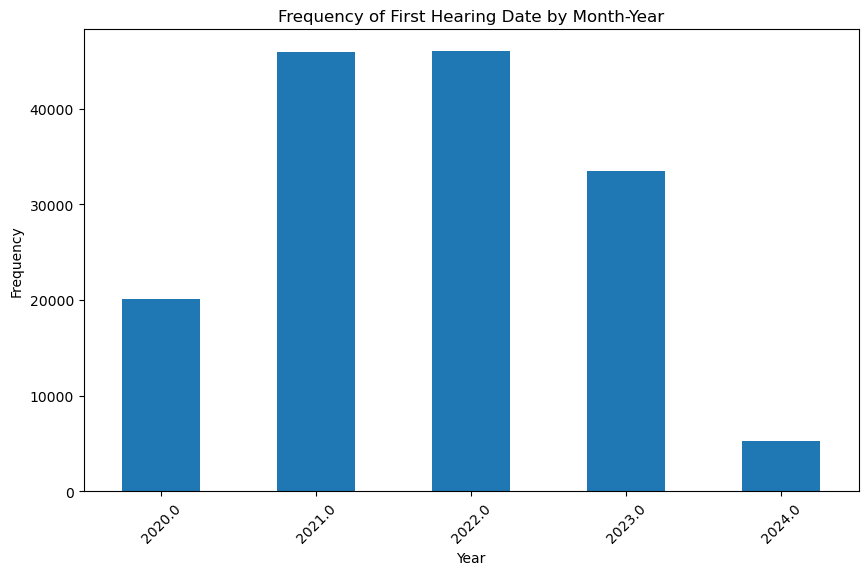

In [79]:
dfc = df.copy()
dfc['First Hearing Date'] = pd.to_datetime(dfc['First Hearing Date'])  
dfc['year'] = dfc['First Hearing Date'].dt.year

dfc['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of First Hearing Date by Month-Year')
plt.xticks(rotation=45)
plt.show()

### WCB Decision
Oh no, this categorical feature only has one value

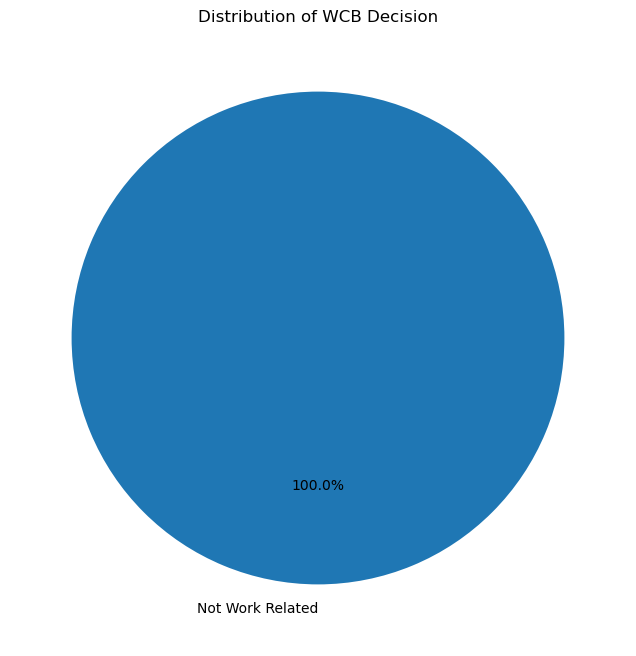

In [116]:
wcb_decision_counts = df['WCB Decision'].value_counts()

plt.figure(figsize=(8, 8))
wcb_decision_counts.plot.pie(autopct='%1.1f%%', startangle=90,)
plt.ylabel('')
plt.title('Distribution of WCB Decision')
plt.show()